In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pathlib
data_dir = pathlib.Path("/home/snekha/datasets/dyes.csv")
data_dire = pathlib.Path("/home/snekha/datasets/dno.csv")

In [8]:
data1=pd.read_csv(data_dir)
data2=pd.read_csv(data_dire)

In [9]:
data= pd.concat([data1,data2],ignore_index=True)

In [76]:
data.head()


,id,name,age,sex,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Depression,Probability
0,617,Blayne,41,M,7,7,9,10,9,7,8,7,6,7,1,80
1,799,Carol,17,F,7,7,6,10,7,10,9,7,7,9,1,77
2,972,Jimmy,86,M,6,6,9,8,10,7,8,8,10,8,1,87
3,822,Boy,57,M,8,10,8,10,9,6,10,6,9,6,1,88
4,813,Garvin,71,M,10,8,8,10,8,8,7,9,7,9,1,66


In [77]:
data.shape

(2000, 16)

In [78]:
data.tail()

,id,name,age,sex,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Depression,Probability
1995,809,Budd,23,M,2,3,2,3,5,3,5,2,5,4,0,31
1996,685,Kilian,82,M,1,3,1,4,2,1,2,3,3,4,0,4
1997,629,Siffre,90,M,5,3,3,5,4,4,5,3,4,4,0,38
1998,760,Tracy,35,M,2,3,2,5,1,2,5,5,3,4,0,50
1999,818,Everard,16,M,1,4,1,4,4,5,1,1,4,3,0,28


In [79]:
data.columns

Index(['id', 'name', 'age', 'sex', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'q8', 'q9', 'q10', 'Depression', 'Probability'],
      dtype='object')

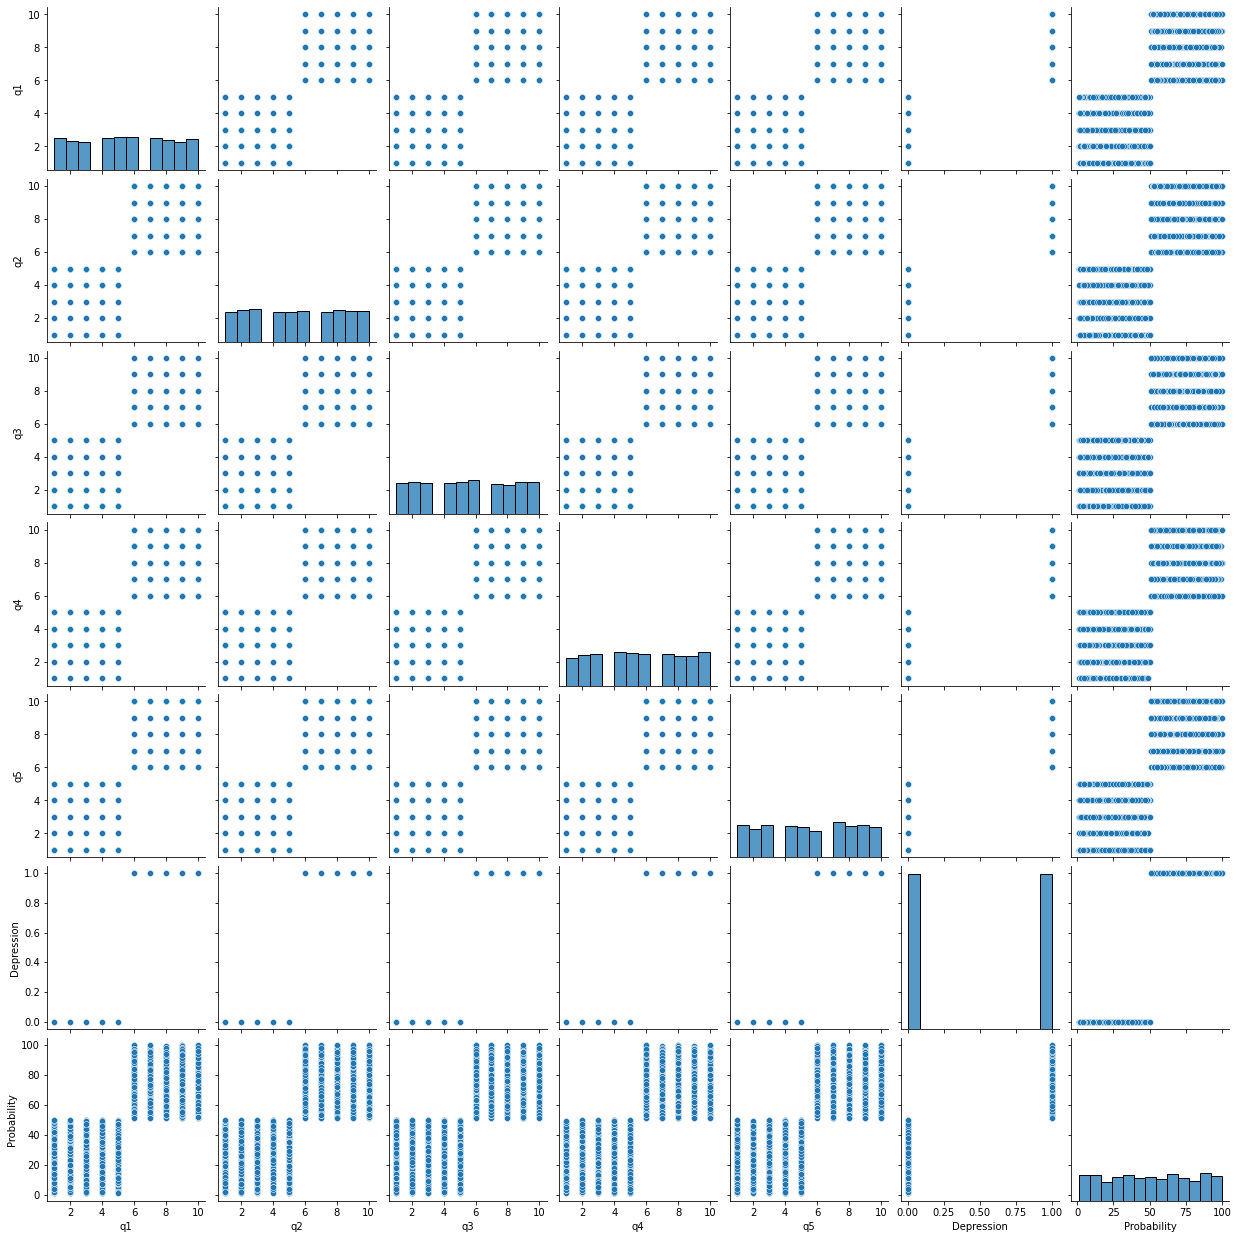

In [81]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data, vars = ['q1', 'q2', 'q3', 'q4',
       'q5','Depression','Probability'] )

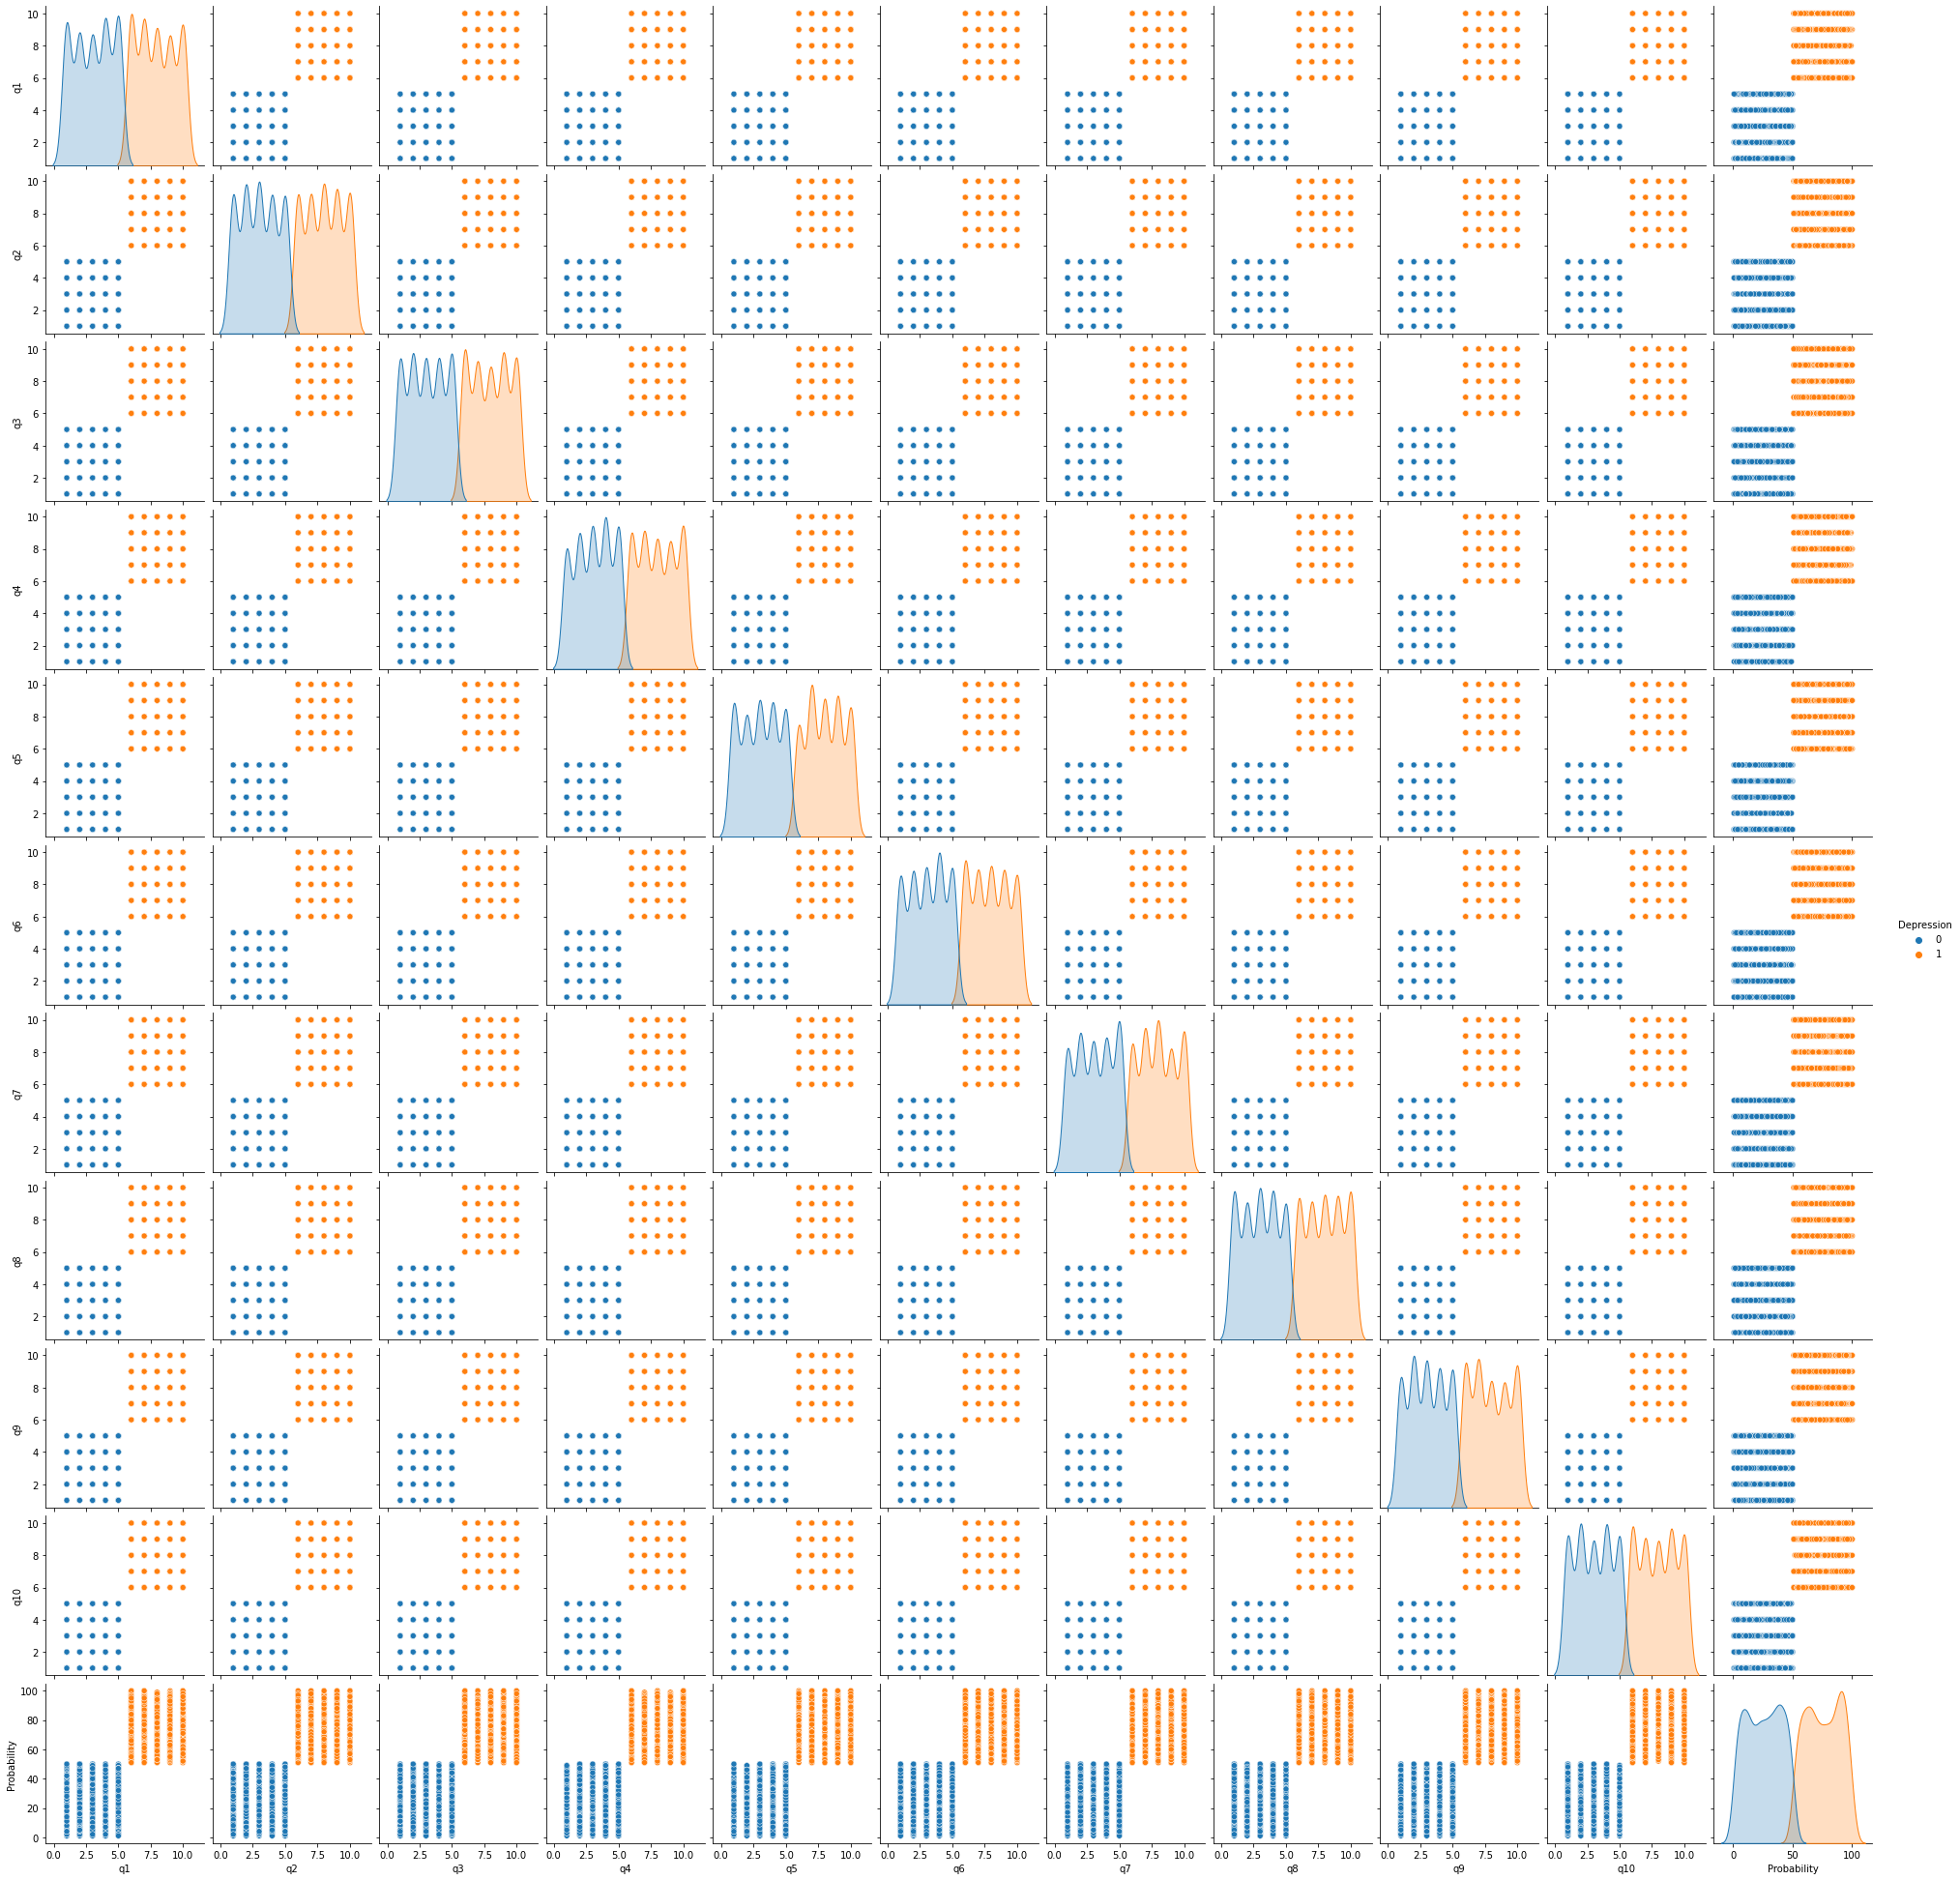

In [88]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data, hue = 'Depression',vars = ['q1', 'q2', 'q3', 'q4',
       'q5','q6','q7','q8','q9','q10','Probability'] )

In [89]:
data['Depression'].value_counts()

1    1000
0    1000
Name: Depression, dtype: int64

/home/snekha/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Depression', ylabel='count'>

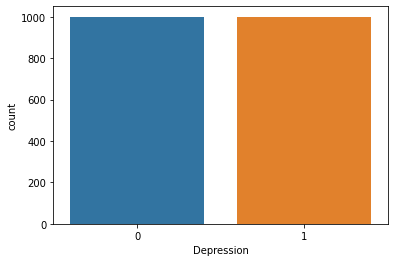

In [90]:
sns.countplot(data['Depression'], label = "Count") 

<AxesSubplot:>

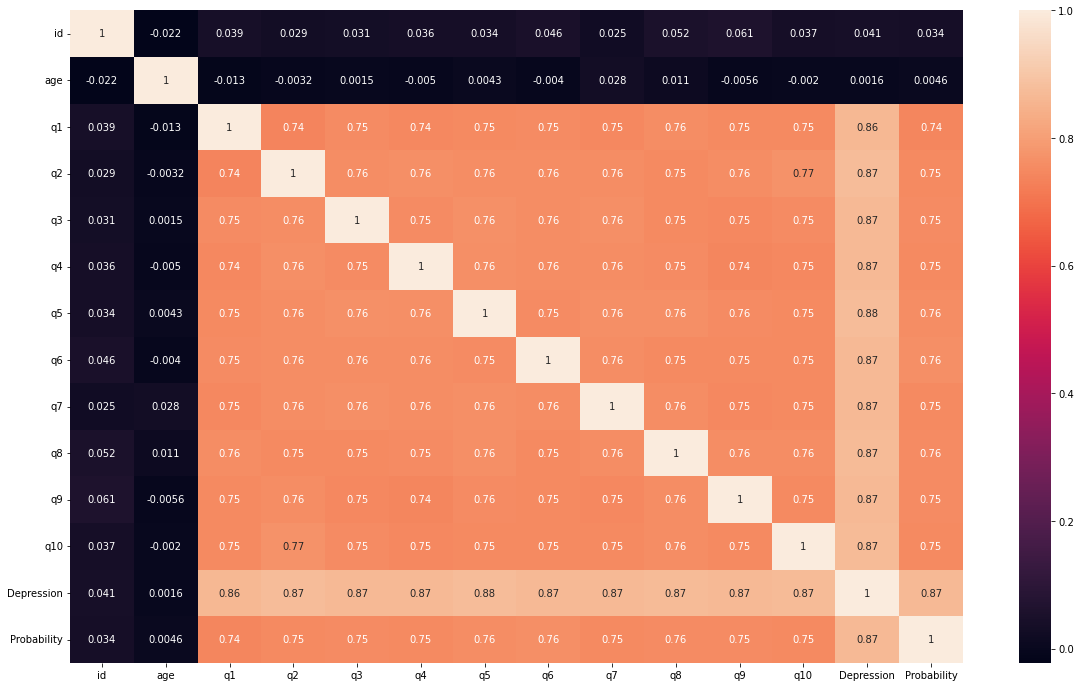

In [91]:
plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True) 

In [92]:
X = data.drop(['Depression','name','id','age','sex'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Probability
0,7,7,9,10,9,7,8,7,6,7,80
1,7,7,6,10,7,10,9,7,7,9,77
2,6,6,9,8,10,7,8,8,10,8,87
3,8,10,8,10,9,6,10,6,9,6,88
4,10,8,8,10,8,8,7,9,7,9,66


In [93]:
y = data['Depression']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Depression, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [96]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (1600, 11)


The size of our testing "X" (input features) is (400, 11)


The size of our training "y" (output feature) is (1600,)


The size of our testing "y" (output features) is (400,)


In [97]:
from sklearn.svm import SVC

In [98]:
svc_model = SVC()

In [99]:
svc_model.fit(X_train, y_train)

SVC()

In [100]:
y_predict = svc_model.predict(X_test)

In [101]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [102]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Depressed', 'is_healthy'],
                         columns=['predicted_depressed','predicted_healthy'])
confusion

,predicted_depressed,predicted_healthy
Depressed,212,0
is_healthy,0,188


<AxesSubplot:>

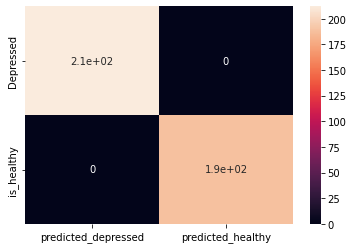

In [103]:
sns.heatmap(confusion, annot=True)

In [104]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       212

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [105]:
X_train_min = X_train.min()
X_train_min

q1             1
q2             1
q3             1
q4             1
q5             1
q6             1
q7             1
q8             1
q9             1
q10            1
Probability    1
dtype: int64

In [106]:
X_train_max = X_train.max()
X_train_max

q1              10
q2              10
q3              10
q4              10
q5              10
q6              10
q7              10
q8              10
q9              10
q10             10
Probability    100
dtype: int64

In [107]:
X_train_range = (X_train_max- X_train_min)
X_train_range

q1              9
q2              9
q3              9
q4              9
q5              9
q6              9
q7              9
q8              9
q9              9
q10             9
Probability    99
dtype: int64

In [108]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Probability
1500,0.222222,0.111111,0.333333,0.333333,0.000000,0.000000,0.000000,0.222222,0.222222,0.111111,0.464646
451,0.666667,0.555556,1.000000,0.555556,0.888889,0.777778,0.555556,0.555556,0.555556,1.000000,0.767677
1627,0.000000,0.333333,0.444444,0.000000,0.111111,0.000000,0.000000,0.222222,0.000000,0.000000,0.363636
669,1.000000,0.777778,0.777778,0.666667,0.777778,0.888889,0.666667,0.666667,0.666667,0.888889,0.515152
1567,0.444444,0.333333,0.222222,0.111111,0.111111,0.444444,0.222222,0.333333,0.111111,0.000000,0.151515


In [109]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [110]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [111]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

In [112]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_depressed', 'is_healthy'],
                         columns=['predicted_depression','predicted_healthy'])
confusion

,predicted_depression,predicted_healthy
is_depressed,212,0
is_healthy,0,188


<AxesSubplot:>

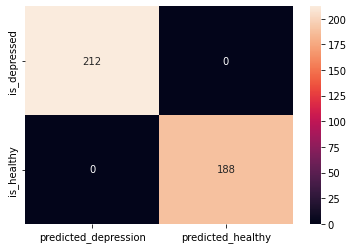

In [113]:
sns.heatmap(confusion,annot=True,fmt="d")

In [114]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       212

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [115]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [116]:
from sklearn.model_selection import GridSearchCV


In [117]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [118]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [119]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=0.1, gamma=1)


In [120]:
grid_predictions = grid.predict(X_test_scaled)

In [121]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_depressed', 'is_healthy'],
                         columns=['predicted_depressed','predicted_healthy'])
confusion

,predicted_depressed,predicted_healthy
is_depressed,212,0
is_healthy,0,188


<AxesSubplot:>

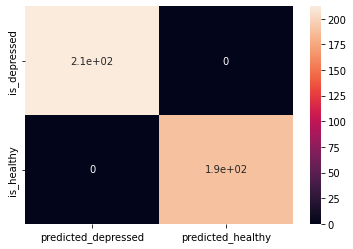

In [122]:
sns.heatmap(confusion, annot=True)

In [123]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       212

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [10]:
data.to_csv('perfect_dep.csv') 